In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'datasets/train'
data_test_path = 'datasets/test'
data_val_path = 'datasets/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


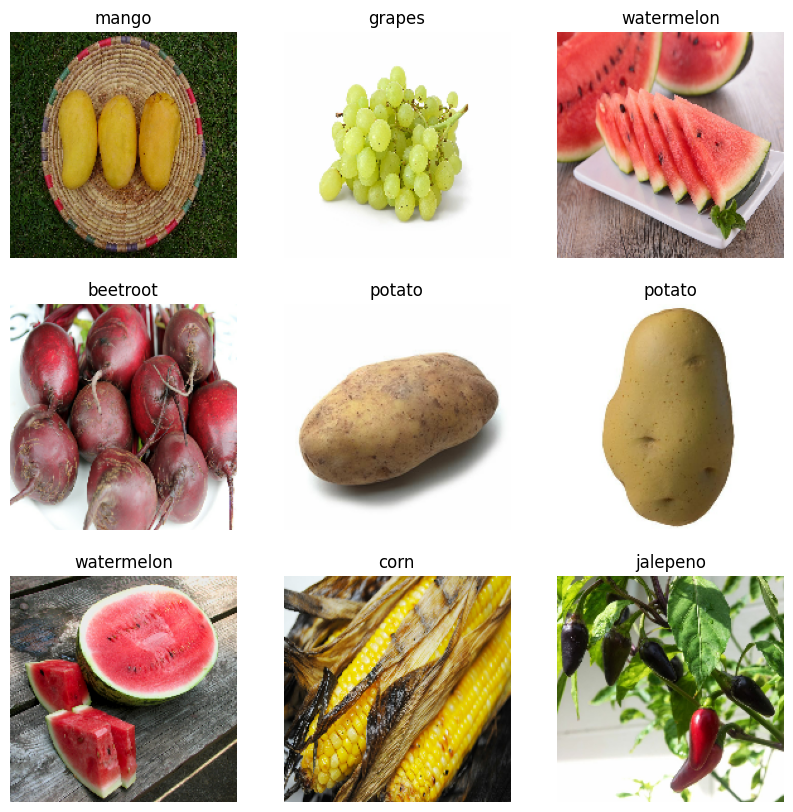

In [8]:
plt.figure(figsize=(10, 10))

for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),

    layers.Dense(128),
    layers.Dense(len(data_cat))
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',  # atau loss yang sesuai dengan modelmu
#     metrics=['accuracy']
# )


In [10]:
epochs_size = 25

history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    batch_size=32,
    verbose=1
)

Epoch 1/25
98/98 [==============================] - 50s 471ms/step - loss: 3.4101 - accuracy: 0.1047 - val_loss: 2.5766 - val_accuracy: 0.3305
Epoch 2/25
98/98 [==============================] - 103s 1s/step - loss: 2.4101 - accuracy: 0.3165 - val_loss: 1.6087 - val_accuracy: 0.5755
Epoch 3/25
98/98 [==============================] - 86s 823ms/step - loss: 1.7040 - accuracy: 0.5127 - val_loss: 0.8468 - val_accuracy: 0.8120
Epoch 4/25
98/98 [==============================] - 49s 486ms/step - loss: 1.0504 - accuracy: 0.6982 - val_loss: 0.5652 - val_accuracy: 0.8604
Epoch 5/25
98/98 [==============================] - 43s 417ms/step - loss: 0.6383 - accuracy: 0.8234 - val_loss: 0.4174 - val_accuracy: 0.9316
Epoch 6/25
98/98 [==============================] - 43s 422ms/step - loss: 0.3583 - accuracy: 0.8992 - val_loss: 0.4156 - val_accuracy: 0.9288
Epoch 7/25
98/98 [==============================] - 50s 485ms/step - loss: 0.2712 - accuracy: 0.9326 - val_loss: 0.3632 - val_accuracy: 0.9402
E

Text(0.5, 1.0, 'Loss')

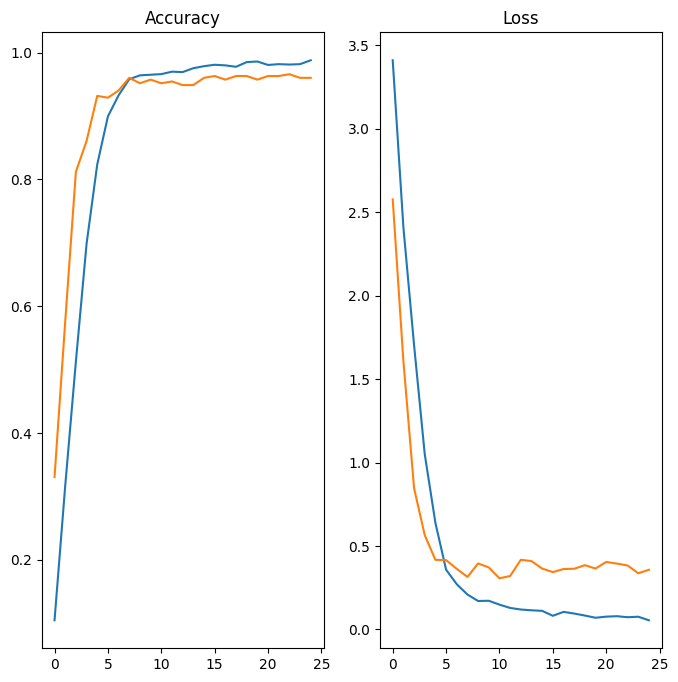

In [11]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [16]:
image = 'prediction/1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [17]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 45ms/step


In [23]:
score = tf.nn.softmax(predict)
print(data_cat[np.argmax(score)])
print(np.max(score) * 100)

banana
99.75998997688293


In [25]:
model.save('image_classify.h5', )